# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # Your code here
    
    # Cargando dataset
    df = pd.read_csv('fraud_data.csv')
    
    # Calculando porcentaje de fraudes:
    result = (np.sum(df["Class"] == 1)) / df.shape[0]
    
    return result # Representan menos del 2%


In [3]:
answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

# Separando atributos de etiquetas:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    
    # Modelo dummy
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_pred = dummy_majority.predict(X_test)
    
    # Calculando la precision del clasificador
    accuracy = dummy_majority.score(X_test, y_test)
    
    # Calculando la sensibilidad o "recall" del clasificador (o poder predictivo positivo)
    recall = recall_score(y_test, y_dummy_pred)
    result = (accuracy, recall)
    return result

In [6]:
answer_two()

(0.9852507374631269, 0.0)

Aquí resalta la importancia de no sólo guiarse por el valor de exactitud (accuracy) como única métrica importante en un clasificador.
Puesto que el dataset contiene más del 98% de observaciones como no-fraude, el clasificador dummy predice correctamente estos eventos, pero predice incorrectamente todas aquellas observaciones que sí son fraude, teniendo un poder predictivo positivo, sensibilidad o "recall" de cero. 

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    # Modelo Support Vector Classifier con parámetros predeterminados
    svc = SVC().fit(X_train, y_train)
    y_svc_pred = svc.predict(X_test)
    
    # Calculando exactitud (accuracy)
    accuracy = svc.score(X_test, y_test)
    
    # Calculando sensibilidad (recall) y precision:
    recall = recall_score(y_test, y_svc_pred) # Buena para fraudes
    precision = precision_score(y_test, y_svc_pred) # Buena para spam
    
    result = (accuracy, recall, precision)
    return result

In [8]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

Aquí vemos tres cosas importantes:
* La **exactitud** es extremadamente buena (el 99% de las observaciones fueron correctamente predichas) pero ...
* La **sensibilidad** es del 35% (del 100% de observaciones fraudulentas, sólo el 35% fueron bien clasificadas por el clasificador), es decir, las demás -el 65% restante- se le escaparon o fueron clasificadas como no fraudulentas (problema grave).)
* La **precisión** es del 93.3%, es decir, del 100% de observaciones fraudulentas predichas por el clasificador, el 93.3% eran realmente fraudulentas. (el 6.7% fueron incorrectamente clasificadas como fradulentas). 

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [9]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    # Modelo con parametros especificos
    svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    
    # Predicciones del clasificador modificadas por un menor threshold
    y_pred_lower_threshold = svc.decision_function(X_test) > -200
    
    # Matriz de confusion (actual-pred)
    confusion_m = confusion_matrix(y_test, y_pred_lower_threshold)
    
    return confusion_m

In [10]:
answer_four() # acc = 0.9937, recall = 0.825, precs = 0.767

array([[5324,   20],
       [  14,   66]], dtype=int64)

Se observa lo siguiente al modificar los parámetros por defecto del SVC y disminuir el threshold (por defecto se encuentra en 0 para este tipo de clasificadores):
* La **exactitud** aumentó ligeramente (99.37%)
* La **sensibilidad** o recall también aumentó (82.5%). Es resultado de: 66 / (14 + 66)
* La **precisión** disminuyó a 76.7%. Es resultado de: 66 / (20 + 66).
* En problemas como este, en el que un falso negativo tiene peores consecuencias que un falso positivo, se prioriza por incrementar la sensibilidad por sobre la precisión. Recordar que siempre hay un balance entre ambas métricas.
* En términos simples, es mejor tener un falso positivo (etiquetar incorrectamente una transacción como fraudulenta) que un falso negativo (clasificar incorrectamente un transacción fraudulenta). Sólo aplica a tipos parecidos de problemas.

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    # Your code here
    # Modelo de clasificador Logistic Regression
    lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)
    #y_score_lr = lr.decision_function(X_test)
    y_score_lr = lr.predict_proba(X_test)[:,1]
    
    # Obteniendo curva precision(x)-recall(y)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score_lr)
    
    # Obteniendo curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_score_lr)
    
    # what is the recall when the precision is `0.75`?
    prec_075_index = np.argmin(np.abs(precision-0.75))
    recall_at_075_precision = recall[prec_075_index]
    
    # what is the true positive rate (recall) when the false positive rate is 0.16?
    fpr_016_index = np.argmin(np.abs(fpr-0.16))
    tpr_at_016_fpr = tpr[fpr_016_index]
    
    result = (recall_at_075_precision, tpr_at_016_fpr)
    return result

In [13]:
answer_five()

(0.825, 0.925)

Recuerda que la sensibilidad o recall también se conoce como *True Positive Rate* 

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [14]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    # Diccionario con parámetros a evaluar
    param_grid = {'penalty': ['l1', 'l2'],
                  'C':[0.01, 0.1, 1, 10, 100]}
    
    # Modelo de clasificacion Logistic Regression
    # En versiones actualizadas de sklearn solver cambió de
    # "liblinear" a "lbfgs"
    lr = LogisticRegression(solver="liblinear")
    
    # Iniciando calculo exhaustivo de metrica "recall" para mismo clasificador pero con diferentes parámetros
    # En versiones actualizadas de sklearn GridSearch cambió de cv = 3 a 5
    grid_recall = GridSearchCV(lr, param_grid = param_grid, scoring= "recall", cv=3).fit(X, y)
    
    # Creando array con dimesiones solicitadas
    test_score = grid_recall.cv_results_["mean_test_score"].reshape(5,2)
    
    return test_score

In [15]:
answer_six()

array([[0.6965532 , 0.75843897],
       [0.79212363, 0.80055073],
       [0.80337559, 0.80337559],
       [0.79492475, 0.80057447],
       [0.79492475, 0.79492475]])

* Podemos observar que la combinación de parámetros C = 1 y penalty = l1 o l2 dan el mayor valor de la métrica recall, por lo que estos parámetros son los indicados para hacer un clasificador de este tipo.

* En este dataset, el mejor modelo de clasificación resultó ser el SVC


<IPython.core.display.Javascript object>


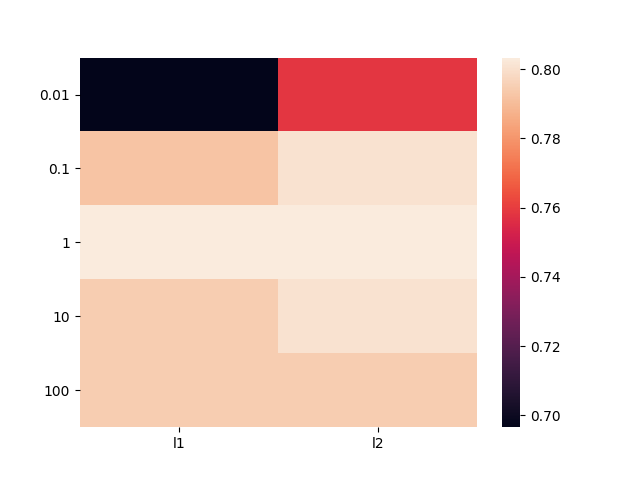

In [16]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())